# Probability of having a sister

## Question:

https://platform.stratascratch.com/technical/2368-probability-of-having-a-sister?tabname=question

Assume the distribution of children per family is as given in the table below:


| n_children | 0   | 1    | 2   | 3    | 4   | >=5 |
|------------|-----|------|-----|------|-----|-----|
| p          | 0.3 | 0.25 | 0.2 | 0.15 | 0.1 | 0   |

Consider a random girl in the population of children. What is the probability that she has a sister?

## Solution

### Strategy:

1) We assume that the probability of a child being boy/girl is independent and equal
2) We are interested in the probability that a randomply picked girl in the children population has - at least - one sister. In other words, we are interested in the probability that in a family there are at least 2 girls, conditioned on the fact that there is at least one girl:

$$P(g \geq 2 | g \geq 1) = \frac{P(g \geq 2 \cap g \geq 1)}{P(g \geq1)}= \frac{P(g \geq 2)}{P(g \geq1)} $$

where the last equality holds because all families with at least 2 girls also have at least 1 girl.

We then have to compute $P(g\geq k)$ with $k=1,2$, as a function of the probability of a family having a number $n$ of children.

$$P(g \geq k) = \sum_{i=0,...,4} P (g \geq k | n = i) \cdot P(n=i)$$


$$\begin{aligned}P(g \geq 1) &= P (g \geq 1 | n = 1) \cdot P(n=1) +P (g \geq 1 | n = 2) \cdot P(n=2) + P (g \geq 1 | n = 3) \cdot P(n=3) + P (g \geq 1 | n = 4) \cdot P(n=5) =  \\
&= 0.5 \cdot P(n=1) + (1- 0.5^2) \cdot P(n=2) + (1-0.5^3) \cdot P(n=3) + (1-0.5^4) \cdot P(n=5) 
\end{aligned}$$

We then need to compute $P (g \geq 2 | n = i)$: for $n=2$ it's straihtforward, it's the probability that both children are girls, so $1/4$. What about $n=3 ,4$?

$$\begin{aligned}P(g \geq 2) &= P (g \geq 2 | n = 2) \cdot P(n=2) + P (g \geq 2 | n = 3) \cdot P(n=3) + P (g \geq 2 | n = 4) \cdot P(n=5) =  \\
&= 0.5 \cdot P(n=1) +P (g \geq k | n = 2) \cdot P(n=2) + P (g \geq k | n = 3) \cdot P(n=3) + P (g \geq k | n = 4) \cdot P(n=5) 
\end{aligned}$$



## Simulation:

In [96]:
import random
import pandas as pd
import numpy as np

# Define the probability distribution of number of children per family
prob_distribution = {0: 0.3, 1: 0.25, 2: 0.2, 3: 0.15, 4: 0.1, 5: 0}

# Generate a sample of families
sample_size = 100000
families = []
for i in range(sample_size):
    n_children = random.choices(list(prob_distribution.keys()), weights=list(prob_distribution.values()))[0]
    family = {"n_children": n_children}
    if n_children > 0:
        family["n_girls"] =  np.random.binomial(n_children, 0.5)
        family["n_boys"] = n_children - family["n_girls"]
    else:
        family["n_girls"]=0
        family["n_boys"]=0
    families.append(family)



In [97]:
families[:10]

[{'n_children': 3, 'n_girls': 1, 'n_boys': 2},
 {'n_children': 1, 'n_girls': 1, 'n_boys': 0},
 {'n_children': 3, 'n_girls': 2, 'n_boys': 1},
 {'n_children': 0, 'n_girls': 0, 'n_boys': 0},
 {'n_children': 0, 'n_girls': 0, 'n_boys': 0},
 {'n_children': 1, 'n_girls': 1, 'n_boys': 0},
 {'n_children': 0, 'n_girls': 0, 'n_boys': 0},
 {'n_children': 4, 'n_girls': 3, 'n_boys': 1},
 {'n_children': 0, 'n_girls': 0, 'n_boys': 0},
 {'n_children': 3, 'n_girls': 1, 'n_boys': 2}]

In [98]:
df=pd.DataFrame.from_dict(families)
df.fillna(0)

,n_children,n_girls,n_boys
0,3,1,2
1,1,1,0
2,3,2,1
3,0,0,0
4,0,0,0
...,...,...,...
99995,1,1,0
99996,1,1,0
99997,0,0,0
99998,0,0,0


array([[<AxesSubplot:title={'center':'n_children'}>,
        <AxesSubplot:title={'center':'n_girls'}>],
       [<AxesSubplot:title={'center':'n_boys'}>, <AxesSubplot:>]],
      dtype=object)

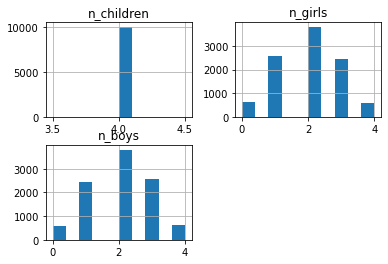

In [99]:
df[df['n_children']==4].hist()

In [100]:
twogirls=df[df['n_girls']>=2].count()
onegirl=df[df['n_girls']>=1].count()
print= onegirl[0]

In [101]:
ratio=twogirls[0]/onegirl[0]
ratio

0.38788242351529695